# <font color="red">Explorando a beleza do mapeamento entre espaços em SVMs, autoencoders e algoritmos de aprendizado múltiplo (isomaps)</font>

<font color="yellow">Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [Baseado no tutorial de Salih Salih](https://towardsdatascience.com/machine-learning-algorithms-as-a-mapping-between-spaces-from-svms-to-manifold-learning-b1dfe1046e4f)

# <font color="pink">Support Vector Machines</font>

<font color="orange">`Support Vector Machines` (SVMs) são algoritmos de aprendizado de máquina conhecidos que se destacam na classificação de dados. Como mencionamos no início:</font>

```
Em dimensões inferiores, a separabilidade linear é muitas vezes impossível, o que significa que é difícil dividir classes com um limite linear simples.
```
Os SVMs superam essa dificuldade transformando os dados em um espaço de dimensão superior, facilitando sua separação e classificação. Para ilustrar isso, vejamos um exemplo. O código abaixo gera dados sintéticos que claramente não são separáveis ​​linearmente em seu espaço original.


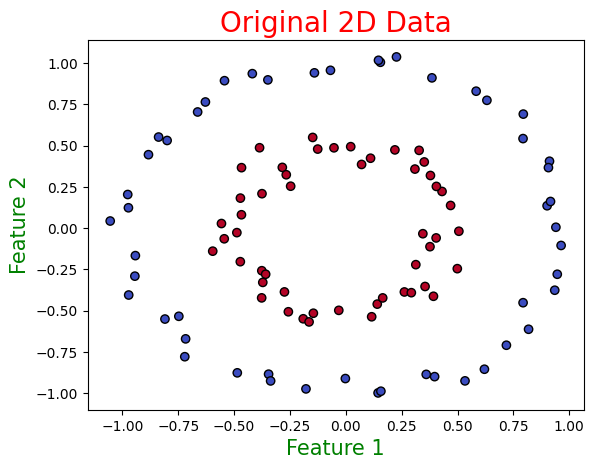

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Gere dados sintéticos que não sejam linearmente separáveis:
X, y = make_circles(n_samples=100, factor=0.5, noise=0.05)

# Visualizando os dados:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1', color="g", size=15)
plt.ylabel('Feature 2', color="g", size=15)
plt.title('Original 2D Data', color="r", size="20")
plt.show()

Vejamos um exemplo típico para entender como esses dados se tornam separáveis ​​quando transformados em dimensões superiores.

Transformaremos cada ponto `2D (x, y)` em um ponto `3D (x, y, z)`, onde `z = x² + y²`. A transformação adiciona uma nova terceira dimensão com base na distância quadrada da origem no espaço 2D. Os pontos que estão mais distantes da origem no espaço 2D serão mais altos no espaço 3D porque sua distância quadrada é maior.

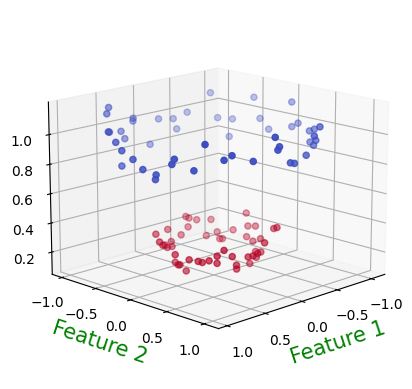

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Transforme os dados 2D em 3D para visualização:
Z = X[:, 0]**2 + X[:, 1]**2  # Use a distância quadrada da origem como a terceira dimensão

# Visualize the 3D data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Z, c=y, cmap=plt.cm.coolwarm)

# Set labels
ax.set_xlabel('Feature 1', color="green", size=15)
ax.set_ylabel('Feature 2', color="green", size=15)
ax.set_zlabel('Transformed Feature')

# Set the viewpoint
elevation_angle = 15  # Adjust this to change the up/down angle
azimuth_angle = 45  # Adjust this to rotate the plot
ax.view_init(elev=elevation_angle, azim=azimuth_angle)

plt.show()

<font color="orange">Você pode notar pela saída acima que após essa transformação, nossos dados se tornam linearmente separáveis ​​por um hiperplano 2D.

Outro exemplo é a eficácia das dosagens dos medicamentos. Um paciente só fica curado se a dosagem estiver dentro de uma determinada faixa. `Dosagens muito baixas ou muito altas são ineficazes`. Este cenário cria naturalmente um conjunto de dados que não é linearmente separável, tornando-o um bom candidato para demonstrar como um kernel polinomial pode ajudar.</font>

In [10]:
from sklearn.svm import SVC # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

# Train the SVM model on the 2D data
svc = SVC(kernel='linear', C=1.0)
svc.fit(X, y)

# Create a function to plot decision boundary
def plot_svc_decision_function(model, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')

# Adjust the figure size for better visualization
plt.figure(figsize=(8, 5))

# Scatter plot for original dosage points
plt.scatter(dosages, np.zeros_like(dosages), c=y, cmap='bwr', marker='s', s=50, label='Original Dosages')

# Scatter plot for dosage squared points
plt.scatter(dosages, squared_dosages, c=y, cmap='bwr', marker='^', s=50, label='Squared Dosages')

# Calling the function to plot the SVM decision boundary
plot_svc_decision_function(svc)

# Expanding the limits to ensure all points are visible
plt.xlim(min(dosages) - 1, max(dosages) + 1)
plt.ylim(min(squared_dosages) - 10, max(squared_dosages) + 10)

# Adding labels, title and legend
plt.xlabel('Dosage')
plt.ylabel('Dosage Squared')
plt.title('SVM Decision Boundary with Original and Squared Dosages')
plt.legend()

# Display the plot
plt.show()

NameError: name 'dosages' is not defined

<Figure size 800x500 with 0 Axes>